Build week :- Student Exam Performance

Team members:

Yash pratap singh (Team lead)

Sumit Solanki

Shubham



## Data Cleaning -

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Loading the dataset

In [ ]:
df=pd.read_csv("StudentsPerformance.csv")
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


Some basic info

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [ ]:
df.isnull().sum()

,0
gender,0
race/ethnicity,0
parental level of education,0
lunch,0
test preparation course,0
math score,0
reading score,0
writing score,0


In [ ]:
print("skewness")
df.skew(numeric_only=True)

skewness


,0
math score,-0.278935
reading score,-0.259105
writing score,-0.289444


In [ ]:
print("kurtosis")
df.kurt(numeric_only=True)

kurtosis


,0
math score,0.274964
reading score,-0.068265
writing score,-0.033365


Removing duplicates

In [ ]:
def clean_data(data):
    # Duplicate value treatment
    print(f"Duplicate values found: {data.duplicated().sum()}")
    print(f"Duplicates removed. Remaining rows: {len(data.drop_duplicates())}")

    return data.drop_duplicates()

In [ ]:
df = clean_data(df)

Duplicate values found: 0
Duplicates removed. Remaining rows: 1000


Looking for missing values

In [ ]:
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64


In [ ]:
from google.colab import files

cleaned_filename = 'students_performance_cleaned.csv'
df.to_csv(cleaned_filename, index=False)

files.download(cleaned_filename)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

##EDA -

In [ ]:

# Load the CSV file
df = pd.read_csv("students_performance_cleaned.csv")

# See first few rows
print(df.head())

# Shape of data
print(df.shape)

# Info about data
print(df.info())

# Summary statistics
print(df.describe())


   gender race/ethnicity parental level of education         lunch  \
0  female        group B           bachelor's degree      standard   
1  female        group C                some college      standard   
2  female        group B             master's degree      standard   
3    male        group A          associate's degree  free/reduced   
4    male        group C                some college      standard   

  test preparation course  math score  reading score  writing score  
0                    none          72             72             74  
1               completed          69             90             88  
2                    none          90             95             93  
3                    none          47             57             44  
4                    none          76             78             75  
(1000, 8)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null C

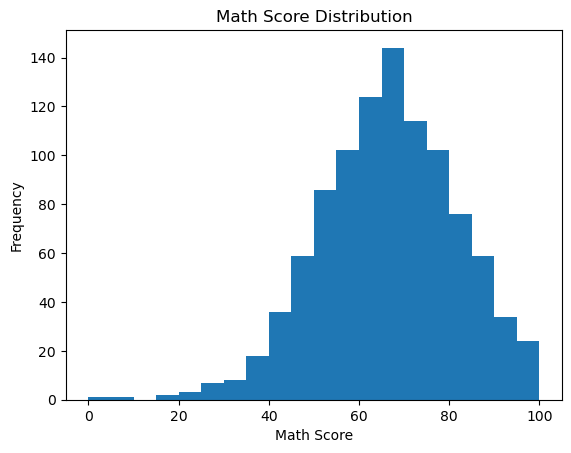

In [ ]:

# --------------------------
# 1. Distribution of Math Scores
plt.hist(df["math score"], bins=20)
plt.title("Math Score Distribution")
plt.xlabel("Math Score")
plt.ylabel("Frequency")
plt.show()


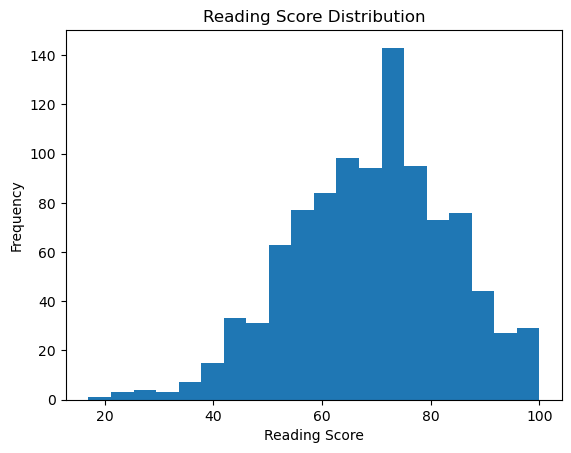

In [ ]:

# 2. Distribution of Reading Scores
plt.hist(df["reading score"], bins=20)
plt.title("Reading Score Distribution")
plt.xlabel("Reading Score")
plt.ylabel("Frequency")
plt.show()


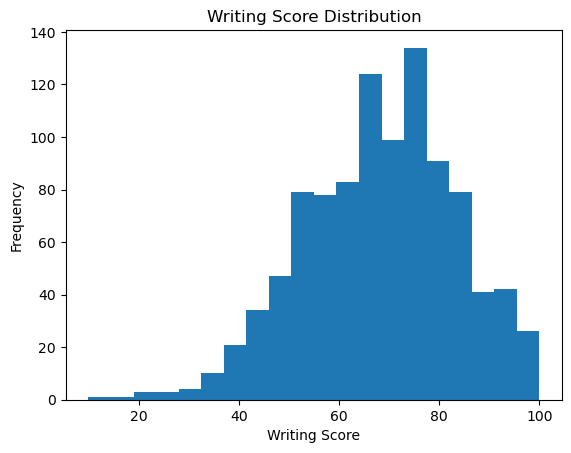

In [ ]:

# 3. Distribution of Writing Scores
plt.hist(df["writing score"], bins=20)
plt.title("Writing Score Distribution")
plt.xlabel("Writing Score")
plt.ylabel("Frequency")
plt.show()


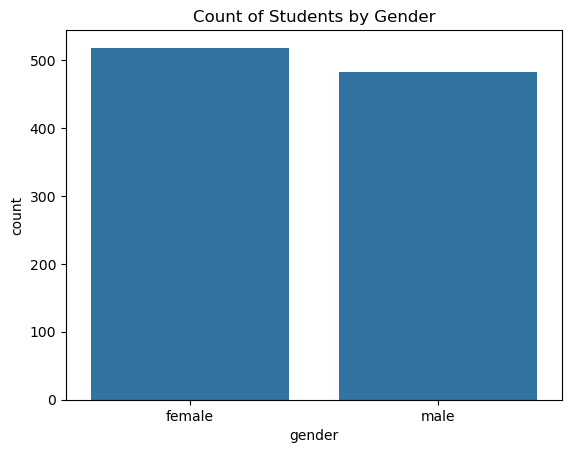

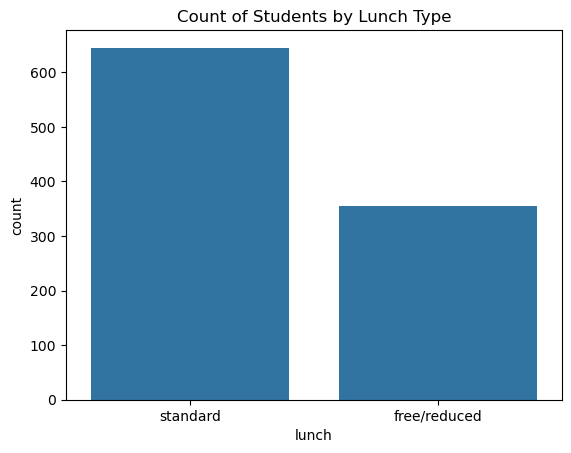

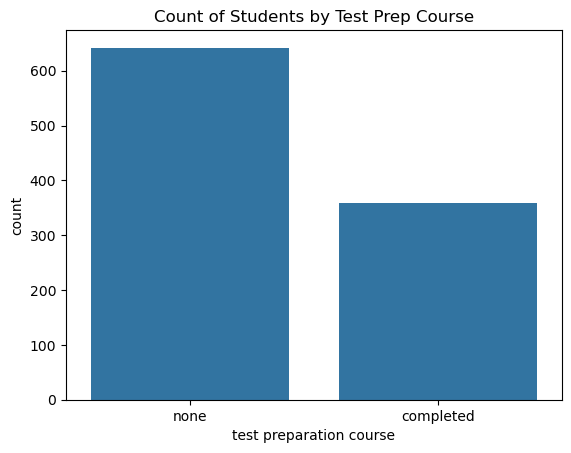

In [ ]:

# --------------------------
# 4. Count plots for categorical columns
sns.countplot(x="gender", data=df)
plt.title("Count of Students by Gender")
plt.show()

sns.countplot(x="lunch", data=df)
plt.title("Count of Students by Lunch Type")
plt.show()

sns.countplot(x="test preparation course", data=df)
plt.title("Count of Students by Test Prep Course")
plt.show()


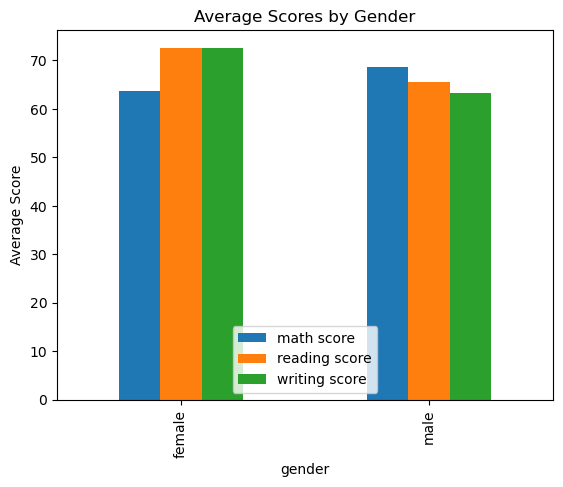

In [ ]:

# --------------------------
# 5. Average Scores by Gender
avg_scores_gender = df.groupby("gender")[["math score", "reading score", "writing score"]].mean()
avg_scores_gender.plot(kind="bar")
plt.title("Average Scores by Gender")
plt.ylabel("Average Score")
plt.show()


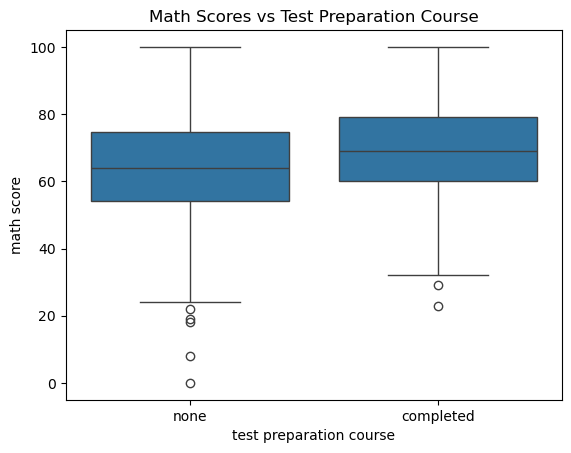

In [ ]:

# 6. Math Scores vs Test Preparation
sns.boxplot(x="test preparation course", y="math score", data=df)
plt.title("Math Scores vs Test Preparation Course")
plt.show()


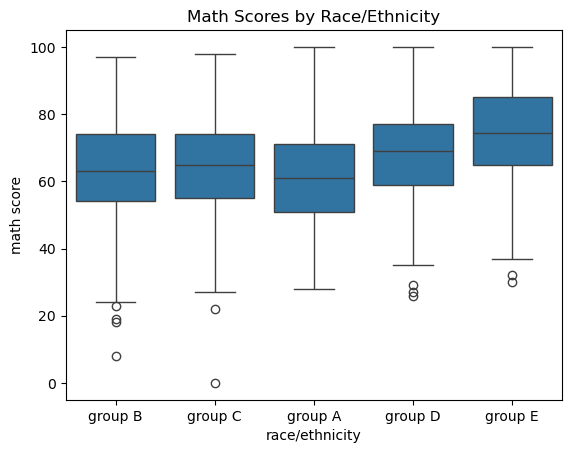

In [ ]:

# 7. Math Scores by Race/Ethnicity
sns.boxplot(x="race/ethnicity", y="math score", data=df)
plt.title("Math Scores by Race/Ethnicity")
plt.show()


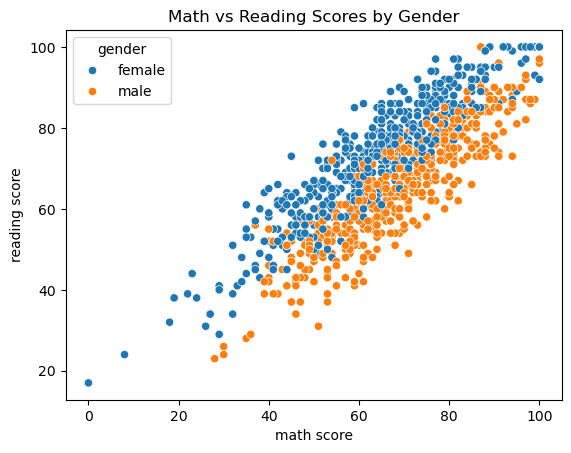

In [ ]:

# 8. Math vs Reading Scores
sns.scatterplot(x="math score", y="reading score", hue="gender", data=df)
plt.title("Math vs Reading Scores by Gender")
plt.show()


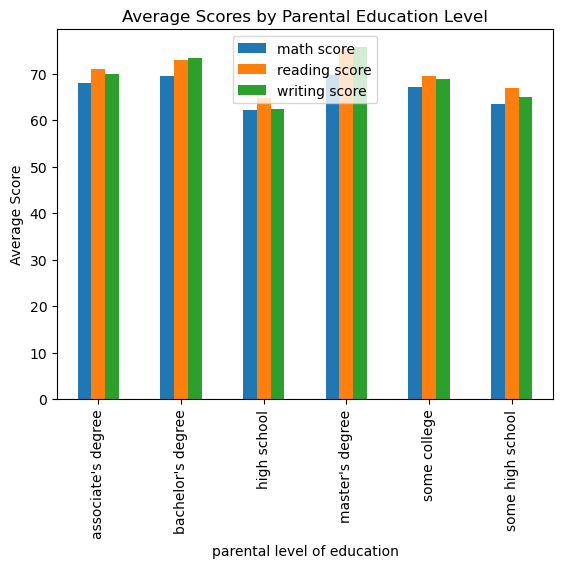

In [ ]:

# 9. Average Scores by Parental Education Level
avg_scores_edu = df.groupby("parental level of education")[["math score", "reading score", "writing score"]].mean()
avg_scores_edu.plot(kind="bar")
plt.title("Average Scores by Parental Education Level")
plt.ylabel("Average Score")
plt.show()


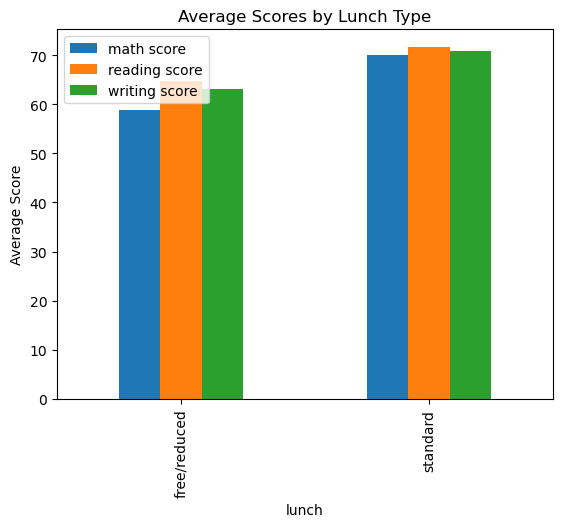

In [ ]:

# 10. Average Scores by Lunch Type
avg_scores_lunch = df.groupby("lunch")[["math score", "reading score", "writing score"]].mean()
avg_scores_lunch.plot(kind="bar")
plt.title("Average Scores by Lunch Type")
plt.ylabel("Average Score")
plt.show()


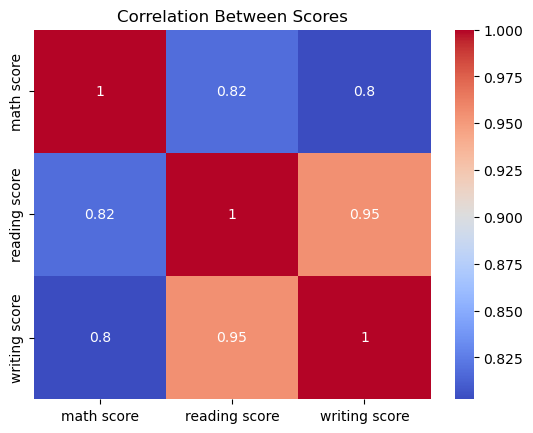

In [ ]:

# --------------------------
# 11. Correlation heatmap for scores
corr = df[["math score", "reading score", "writing score"]].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Correlation Between Scores")
plt.show()


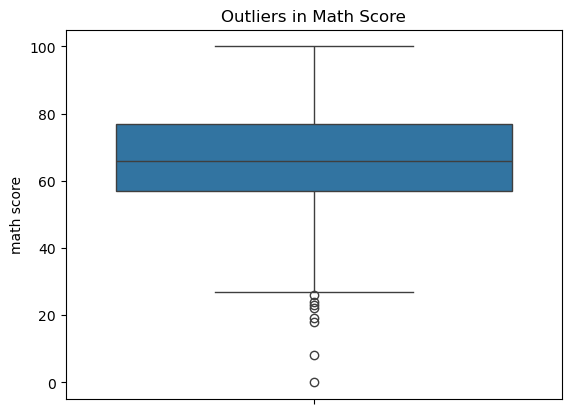

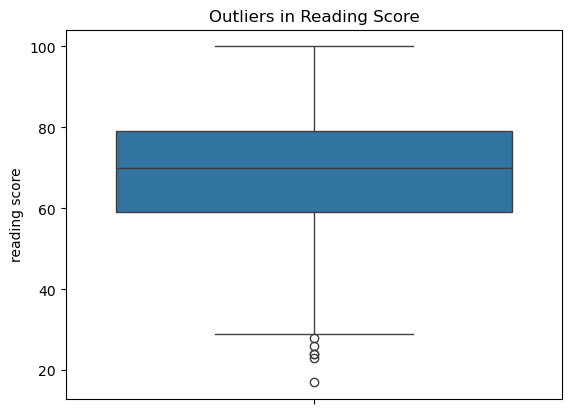

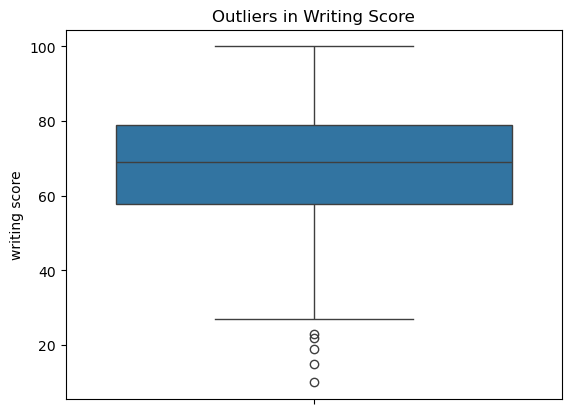

In [ ]:

# --------------------------
# 12. Outlier detection using boxplots
sns.boxplot(y=df["math score"])
plt.title("Outliers in Math Score")
plt.show()

sns.boxplot(y=df["reading score"])
plt.title("Outliers in Reading Score")
plt.show()

sns.boxplot(y=df["writing score"])
plt.title("Outliers in Writing Score")
plt.show()


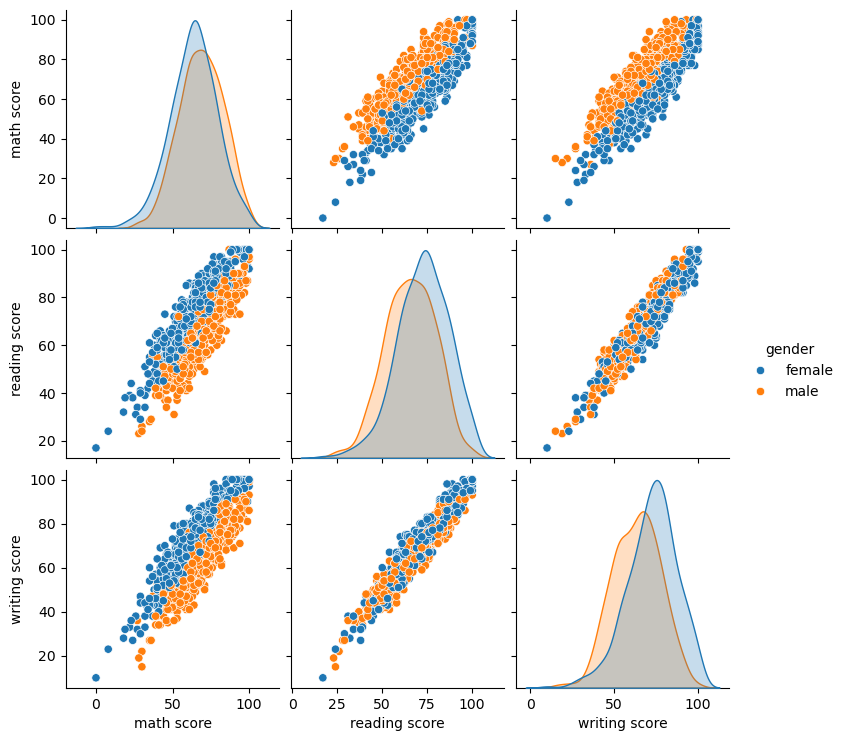

In [ ]:

# --------------------------
# 13. Pairplot of Scores
sns.pairplot(df, vars=["math score", "reading score", "writing score"], hue="gender")
plt.show()


## Insights -

In [ ]:
df = pd.read_csv("students_performance_cleaned.csv")
df.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

In [ ]:
# 1. Overall average scores
avg_scores = df[['math score', 'reading score', 'writing score']].mean()
print(avg_scores)

math score       66.089
reading score    69.169
writing score    68.054
dtype: float64


In [ ]:
# 2. Gender performance
gender_perf = df.groupby('gender')[['math score', 'reading score', 'writing score']].mean()
print(gender_perf)

        math score  reading score  writing score
gender                                          
female   63.633205      72.608108      72.467181
male     68.728216      65.473029      63.311203


In [ ]:
# 3. Test preparation course effect
test_prep = df.groupby('test preparation course')[['math score', 'reading score', 'writing score']].mean()
print(test_prep)

                         math score  reading score  writing score
test preparation course                                          
completed                 69.695531      73.893855      74.418994
none                      64.077882      66.534268      64.504673


In [ ]:
# 4. Lunch type effect
lunch_effect = df.groupby('lunch')[['math score', 'reading score', 'writing score']].mean()
print(lunch_effect)


              math score  reading score  writing score
lunch                                                 
free/reduced   58.921127      64.653521      63.022535
standard       70.034109      71.654264      70.823256


In [ ]:
# 5. Race/Ethnicity performance
race_perf = df.groupby('race/ethnicity')[['math score', 'reading score', 'writing score']].mean()
print(race_perf)

                math score  reading score  writing score
race/ethnicity                                          
group A          61.629213      64.674157      62.674157
group B          63.452632      67.352632      65.600000
group C          64.463950      69.103448      67.827586
group D          67.362595      70.030534      70.145038
group E          73.821429      73.028571      71.407143


In [ ]:
# 6. Parental education effect
parent_edu = df.groupby('parental level of education')[['math score', 'reading score', 'writing score']].mean()
print(parent_edu)

                             math score  reading score  writing score
parental level of education                                          
associate's degree            67.882883      70.927928      69.896396
bachelor's degree             69.389831      73.000000      73.381356
high school                   62.137755      64.704082      62.448980
master's degree               69.745763      75.372881      75.677966
some college                  67.128319      69.460177      68.840708
some high school              63.497207      66.938547      64.888268



 Correlation Between Subjects:
               math score  reading score  writing score
math score       1.000000       0.817580       0.802642
reading score    0.817580       1.000000       0.954598
writing score    0.802642       0.954598       1.000000


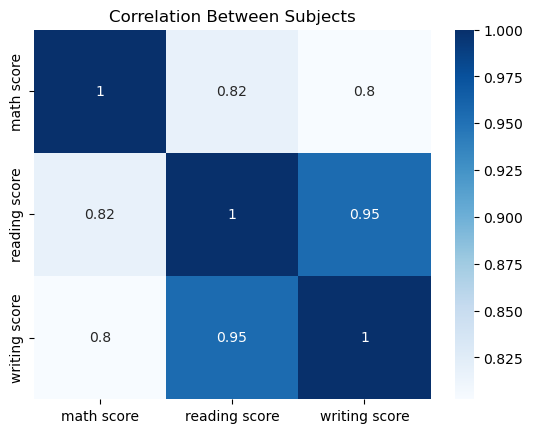

In [ ]:
# 2. Correlation between subjects
print("\n Correlation Between Subjects:")
print(df[['math score', 'reading score', 'writing score']].corr())
sns.heatmap(df[['math score', 'reading score', 'writing score']].corr(), annot=True, cmap="Blues")
plt.title("Correlation Between Subjects")
plt.show()

In [ ]:
#  High performance combination analysis
high_perf = df[(df['lunch'] == 'standard') &
               (df['test preparation course'] == 'completed') &
               (df['parental level of education'].isin(["master's degree", "bachelor's degree"]))]
print("\n  High Performance Combination Stats:")
print(high_perf.describe())


  High Performance Combination Stats:
       math score  reading score  writing score
count   37.000000      37.000000      37.000000
mean    77.297297      79.729730      81.540541
std     13.120944      13.052562      11.526767
min     52.000000      58.000000      62.000000
25%     68.000000      70.000000      71.000000
50%     77.000000      81.000000      81.000000
75%     88.000000      90.000000      91.000000
max    100.000000     100.000000     100.000000


In [ ]:
df['average_score'] = df[['math score', 'reading score', 'writing score']].mean(axis=1)
#  Top 10% performers characteristics
top_10 = df[df['average_score'] >= df['average_score'].quantile(0.90)]
print(" Top 10% Performers Characteristics:")
print(top_10[['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']].value_counts())

print('\nFinds top 10% students and shows which traits they share')

 Top 10% Performers Characteristics:
gender  race/ethnicity  parental level of education  lunch     test preparation course
female  group E         associate's degree           standard  none                       4
        group C         bachelor's degree            standard  completed                  4
                        some college                 standard  completed                  3
        group D         master's degree              standard  none                       3
        group E         associate's degree           standard  completed                  3
                                                                                         ..
                        high school                  standard  none                       1
                        master's degree              standard  none                       1
                        some college                 standard  completed                  1
male    group A         associate's degree      


 Test Prep Improvement by Race/Ethnicity:
test preparation course  completed       none  improvement
race/ethnicity                                            
group A                  70.064516  59.212644    10.851872
group B                  70.642157  62.584699     8.057457
group C                  71.868946  64.387789     7.481157
group E                  76.694444  69.795833     6.898611
group D                  73.532520  67.196296     6.336224


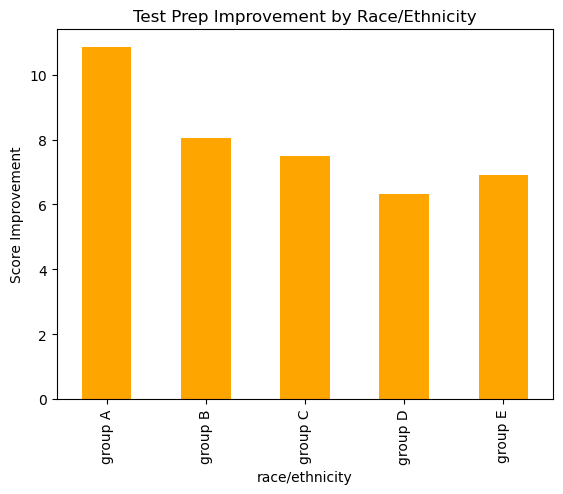

In [ ]:
# 8. Test prep improvement by race/ethnicity
race_prep = df.groupby(['race/ethnicity', 'test preparation course'])['average_score'].mean().unstack()
race_prep['improvement'] = race_prep['completed'] - race_prep['none']
print("\n Test Prep Improvement by Race/Ethnicity:")
print(race_prep.sort_values(by='improvement', ascending=False))
race_prep['improvement'].plot(kind='bar', color='orange')
plt.title("Test Prep Improvement by Race/Ethnicity")
plt.ylabel("Score Improvement")
plt.show()